**Rwanda CO2 Emissions Competition**

In [3]:
SEED = 42069
np.random.seed(SEED)

1. Data Exploration

In [25]:
import pandas as pd
import numpy as np
import random
import os
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

DATA_PATH = '/kaggle/input/playground-series-s3e20/'

trainData = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))
testData = pd.read_csv(os.path.join(DATA_PATH, "test.csv"))
sampleSubmission = pd.read_csv(os.path.join(DATA_PATH, "sample_submission.csv"))

/kaggle/input/playground-series-s3e20/sample_submission.csv
/kaggle/input/playground-series-s3e20/train.csv
/kaggle/input/playground-series-s3e20/test.csv


In [8]:
trainData.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [10]:
trainData.shape, testData.shape, sampleSubmission.shape

((79023, 76), (24353, 75), (24353, 2))

2. Feature Engineering

In [17]:
trainData['location'] = [str(x) + '_' + str(y) for x,y in zip(trainData.latitude, trainData.longitude)]


3. Model

In [20]:
X = trainData.drop(['ID_LAT_LON_YEAR_WEEK', 'location', 'emission'], axis=1).fillna(0)
y = trainData.emission

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = SEED)

model = RandomForestRegressor(random_state = SEED, n_jobs = 1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'RMSE: {mean_squared_error(y_test, y_pred, squared = False)}')

NameError: name 'clf' is not defined

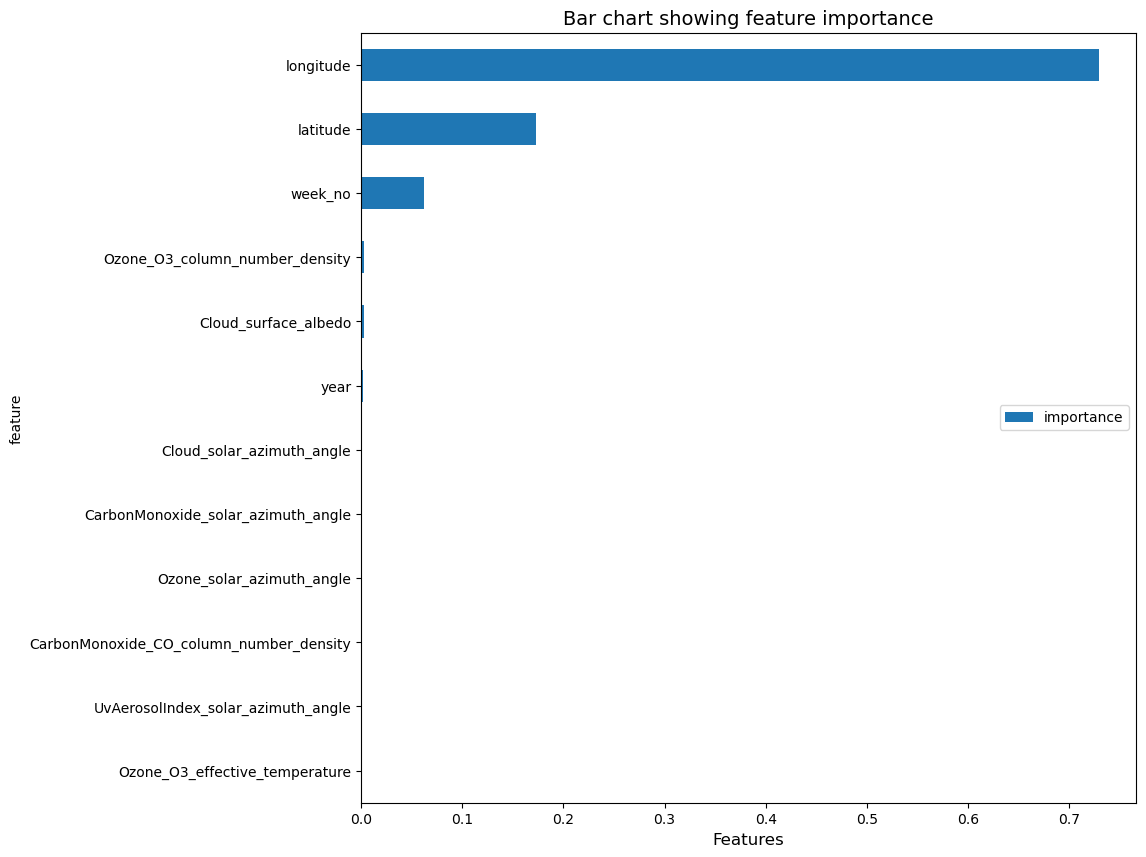

In [22]:
impo_df = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df = impo_df[:12].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10))
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', fontsize = 14)
plt.xlabel('Features', fontsize = 12)
plt.show()

4. Predictions

In [27]:
test = testData.drop(['ID_LAT_LON_YEAR_WEEK'], axis = 1).fillna(0)
predictions = model.predict(test)

sub_file = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': testData.ID_LAT_LON_YEAR_WEEK, 'emission': predictions})
sub_file.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,3.594947
1,ID_-0.510_29.290_2022_01,3.926093
2,ID_-0.510_29.290_2022_02,4.167617
3,ID_-0.510_29.290_2022_03,4.114764
4,ID_-0.510_29.290_2022_04,3.983420
